# <span style=color:blue> Python resources for data processing and analysis: Numpy, pandas, Mathplotlib, Scit-learn...</span>

****

## I. First step: loading packages and dataset

In [1]:
# Loading neaded packages
from sklearn import datasets
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.getcwd()
# os.chdir()
sns.get_dataset_names()

In [2]:
# Loading datasets from differents type
 #pd.read_csv()
 #pd.read_excel()
 #pd.read_stata()
 #pd.read_spss()
 #pd.read_sas()
 #pd.read_table("data.txt")

# loading datasets from openml.org repository
 #datasets.fetch_openml(name = 'iris')

# Loading datasets form sklearn package
 #datasets.load_iris()
dt = pd.read_excel('MaliData.xls')

## II. Take a look at the data base

In [ ]:
dt.head() #                                                 Look at the first rows
dt.tail() #                                                 Look at the last rows
dt[['ID','CA','DC']] #                                      subset of data
dt.loc[:,'ID':'CA'] #                                       location of var to get a subset
dt.loc[dt.CA < 1000000, ['ID','DC']] #                      Select columns with specific rows
dt.iloc[20:30] #                                            Select rows
dt.iloc[[1,2,3,4],[1,2]] #                                  Select specific rows and columns
dt.nlargest(10, 'PRODUCTIVITE') #                           The n largest productivity (dt.smallest())
dt.filter(var = 'end$') #                                   Filter data where ended with 'end' (also: '^begin', '^x[1-5]$',)
dt[dt.VILLE == 1] #                                         Subset of data
dt.sample(frac = 0.25) #                                    Randomly select a fractio of rows or a number of rows (n = ??)
dt.describe() #                                             Get some statistics
print(dt.dtypes) #                                          Types of variables 
print(dt.info()) #                                          Informations in database
dt.columns #                                                Variables names
dt.sort_values('ID') #                                      Sort the data
dt.sort_index() #                                           Sort data by index
dt['VILLE'].value_counts() #                                Nomber obser
dt['VILLE'].nunique()
#sum(), min(), max(), sum(), var(), std(), quantile([0.25, 0.50, 0.75])
dt.count()
#dt.apply(lambda x: x.max())
dt.fillna(9999) #                                           Replace missing data by 9999
df.drop_duplicates() #                                      Drop duplicates obs within the specifique variable

## III. Organizing the data and variables

In [ ]:
pd.melt(dt, column = , value = ) #                          Tranform data form wide to long
dt.pivot() #                                                Transform data from long to wide
pd.concat() #                                               Append rows of datasets or columns (axis = 1)
pd.merge(dt,dt2, how='right', on='key') #                   Right==dt-->dt2 (also : left, inner(commun rows), outer (all rows))
dt[dt.key.isin(dt2.key)] #                                  Join dt that have a matching in dt2

## IV. Manipulating variables

In [12]:
dt.rename(columns = {'ID':'ID_FIRM'}) #                     Rename variables
dt.assign(moi=abs(dt.DC-dt.CA),toi=dt.ID+2)[['moi','toi']] #Create new variables
dt['vous'] = dt.ID**2 #                                     Create a nother a single variable
label = ["class{0}".format(i) for i in range(0, 6)]
dt['clasTall'] = pd.cut(dt.CA, range(30000, 36215287808,  6035876301), right = False, labels = label)
dt.class2 = pd.qcut(dt.CA, 6, labels = label) #             Divided in equal range of n classs
pd.crosstab(dt.VILLE, dt.BRANCHE, rownames = ["Les villes"], colnames = ["Les activites"], normalize = 'columns')
pd.crosstab(dt.VILLE, [dt.BRANCHE,dt.Statut_firme], rownames = ["Les villes"], colnames = ["Les activites","Le statut"])
pd.pivot_table(index = dt.BRANCHE, columns = dt.Statut_firme, values = dt.ID)
dt.pivot_table(index = 'BRANCHE', columns = 'Statut_firme', values = 'ID', margins = True, aggfunc='mean') # np.statistics
pd.get_dummies(dt.key) #                                    Transform categoriels variable into dummies
dt.groupby(by = "VILLE")['CA','DC'].sum() #                 Grouping is also interessing to get tabulation

Les activites  1.0          2.0        3.0    4.0       
Le statut        1   2    3   1  2   3   1  3   1  2   3
Les villes                                              
1              107  10  110  23  3  14  30  5  50  7  39
2               43  11   39   7  5  66   4  1  40  7  77

# V. Graphics

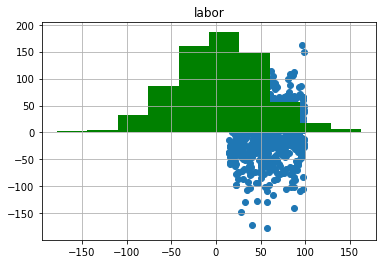

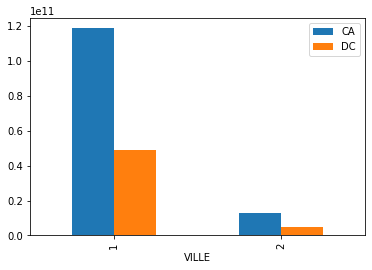

In [3]:
dt['age'] = np.random.randint(15,100, size = len(dt))
dt['labor'] = np.random.normal(1,50, size = len(dt))
dt.hist(column = 'labor', color = 'g')
plt.scatter(dt['age'], dt['labor'])
dt.groupby(by = "VILLE")['CA','DC'].sum().plot(kind='bar')

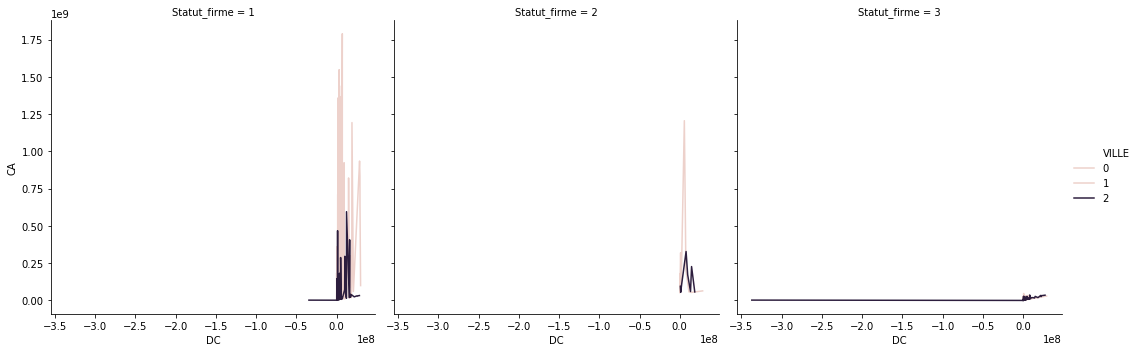

In [4]:
# relplot(x, y, hue, kind, style, palette, size, sizes(15,200), ci) we have scater or line
sns.relplot(x = "DC", y = "CA", hue = "VILLE", kind = "line", col = "Statut_firme", data = dt[dt["DC"]<30000000])

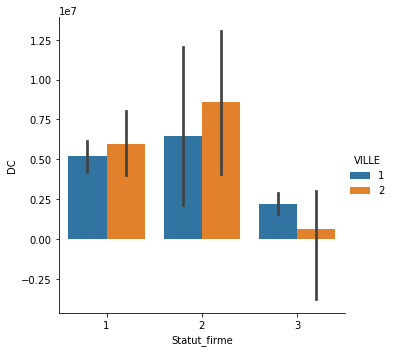

In [5]:
sns.catplot(x = "Statut_firme", y = "DC", hue = "VILLE", kind = "bar", data = dt[dt["DC"]<30000000])

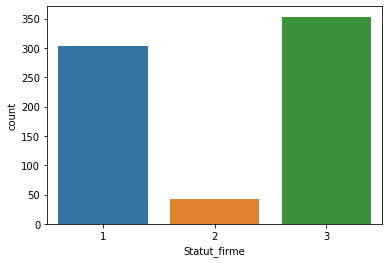

In [6]:
sns.countplot(x = "Statut_firme", data = dt)

In [ ]:
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, and ticks
sns.despine(left=True)

sns.distplot(x, kde=False, rug=True)
sns.kdeplot(x, shade=True)
sns.regplot(x="total_bill", y="tip", data=tips)
sns.lmplot(x="total_bill", y="big_tip", data=tips, logistic=True, y_jitter=.03)
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), scatter_kws={"s": 80})

g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()